# **GRIP @ The Sparks Foundation**

# Data Science and Business Analystics Intern

# **Author : SONAA V**

# Task 3 : Exploratory Data Analysis Retail on SampleSuperstore Dataset


# ***Problem Statement***


###Perform '***Exploratory Data Analysis***' on dataset '***SampleSuperstore***'.
## The quantity of items don't impact on the Profits generated. This means, the profit generated per item is not consistent.The discount given for the items also, doesn't effect in any more profits.Some states have negative Mean Profits, i.e., no profits!

# **Import all the required libraries**

In [80]:
#import necesarry libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# **Read and Print the data**

Dataset Link : https://drive.google.com/file/d/1lV7is1B566UQPYzzY8R2ZmOritTW299S/view

In [81]:
from google.colab import files
uploaded = files.upload()

Saving SampleSuperstore.csv to SampleSuperstore (2).csv


In [82]:
df = pd.read_csv('SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


# **Evaluate the data using statistical function**

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9194 entries, 0 to 9193
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9194 non-null   object 
 1   Segment       9194 non-null   object 
 2   Country       9194 non-null   object 
 3   City          9194 non-null   object 
 4   State         9194 non-null   object 
 5   Postal Code   9194 non-null   int64  
 6   Region        9194 non-null   object 
 7   Category      9194 non-null   object 
 8   Sub-Category  9194 non-null   object 
 9   Sales         9194 non-null   float64
 10  Quantity      9194 non-null   int64  
 11  Discount      9194 non-null   float64
 12  Profit        9194 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 933.9+ KB


In [84]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9194.000000,9194.000000,9194.000000,9194.000000,9194.000000
mean,55127.791168,231.063583,3.792038,0.156521,29.172843
std,32032.345982,634.146218,2.219549,0.206835,237.710883
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.460000,2.000000,0.000000,1.731375
50%,55901.000000,54.898000,3.000000,0.200000,8.694000
75%,90004.000000,210.521000,5.000000,0.200000,29.495000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [85]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [108]:
df.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.022938,0.013490,0.056834,-0.028275
Sales,-0.022938,1.000000,0.194911,-0.029517,0.493929
Quantity,0.013490,0.194911,1.000000,0.011915,0.070043
Discount,0.056834,-0.029517,0.011915,1.000000,-0.217901
Profit,-0.028275,0.493929,0.070043,-0.217901,1.000000


# **unique values of each attribute in dataframe**

In [86]:
print("Number of transactions: ", df['Postal Code'].nunique())
print("Category of products: ",df['Category'].nunique())
print('Number of Region: ',df['Region'].nunique())
print('Number of countries: ',df['Country'].nunique())
print('Number of State: ',df['State'].nunique())
print('Number of Cities: ',df['City'].nunique())
print('Number of Areas : ',df['Postal Code'].nunique())

Number of transactions:  615
Category of products:  3
Number of Region:  4
Number of countries:  1
Number of State:  49
Number of Cities:  518
Number of Areas :  615


# **Missing values in dataframe**

In [87]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

# **Duplicate dataframe**

In [89]:
df.duplicated().sum()

14

# **View the duplicate dataframe**

In [90]:
df.drop_duplicates()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9189,Standard Class,Home Office,United States,Allentown,Pennsylvania,18103,East,Office Supplies,Storage,663.0720,6,0.20,-165.7680
9190,Standard Class,Home Office,United States,Allentown,Pennsylvania,18103,East,Office Supplies,Binders,99.5880,2,0.70,-82.9900
9191,Standard Class,Home Office,United States,Allentown,Pennsylvania,18103,East,Office Supplies,Paper,49.5680,2,0.20,15.4900
9192,Standard Class,Corporate,United States,San Antonio,Texas,78207,Central,Office Supplies,Binders,29.3720,7,0.80,-46.9952


# **Unique values in the dataframe**

In [91]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             518
State             49
Postal Code      615
Region             4
Category           3
Sub-Category      17
Sales           5515
Quantity          14
Discount          12
Profit          6837
dtype: int64

# **Drop irrrelevant column postal code**

In [92]:
col = ['Postal Code']
data_df = df.drop(columns = col,axis=1)
data_df.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


# Correlation between variables -

In [93]:
data_df.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.194911,-0.029517,0.493929
Quantity,0.194911,1.000000,0.011915,0.070043
Discount,-0.029517,0.011915,1.000000,-0.217901
Profit,0.493929,0.070043,-0.217901,1.000000


# **Correlation between columns **

In [94]:
data_df.cov()

,Sales,Quantity,Discount,Profit
Sales,402141.425980,274.340666,-3.871567,74456.517640
Quantity,274.340666,4.926398,0.005470,36.955664
Discount,-3.871567,0.005470,0.042781,-10.713538
Profit,74456.517640,36.955664,-10.713538,56506.463720


# **Visual Representation of the current Dataframe**

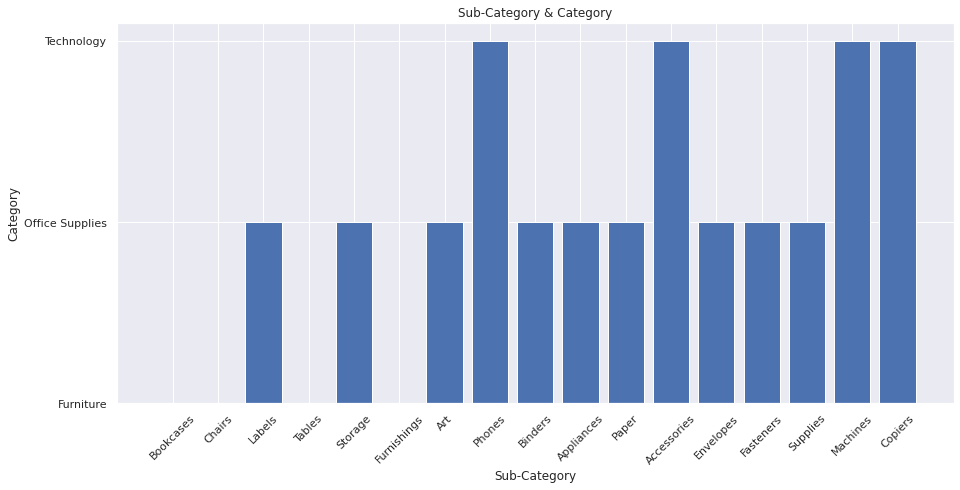

In [95]:
plt.figure(figsize=(15,7))
plt.bar('Sub-Category','Category', data=data_df)
plt.title('Sub-Category & Category')
plt.xlabel('Sub-Category')
plt.ylabel('Category')
plt.xticks(rotation=45)
plt.show()

Binders        1397
Paper          1257
Furnishings     876
Phones          823
Storage         785
Art             729
Accessories     716
Chairs          564
Appliances      428
Labels          330
Tables          297
Envelopes       235
Bookcases       208
Fasteners       202
Supplies        171
Machines        111
Copiers          65
Name: Sub-Category, dtype: int64


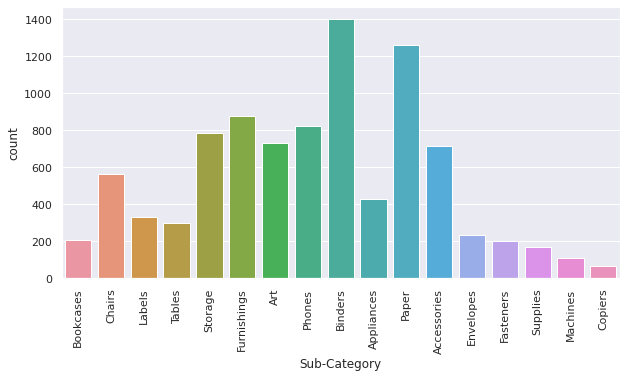

In [96]:
print(data_df['Sub-Category'].value_counts())
plt.figure(figsize=(10,5))
sns.countplot(x=df['Sub-Category'])
plt.xticks(rotation=90)
plt.show()


# **Count the total repeated states**

In [97]:
data_df['State'].value_counts()

California              1817
New York                1020
Texas                    903
Pennsylvania             549
Washington               463
Illinois                 450
Ohio                     410
Florida                  350
North Carolina           240
Michigan                 238
Virginia                 207
Arizona                  207
Tennessee                180
Colorado                 176
Georgia                  176
Kentucky                 132
Massachusetts            129
Indiana                  127
Oregon                   119
New Jersey               114
Maryland                 103
Wisconsin                100
Delaware                  86
Minnesota                 85
Connecticut               77
Oklahoma                  62
Missouri                  59
Alabama                   59
Arkansas                  56
Rhode Island              53
Utah                      53
Mississippi               52
South Carolina            42
Louisiana                 38
Nevada        

# **Visualization to view the Repeated states**

<function matplotlib.pyplot.show>

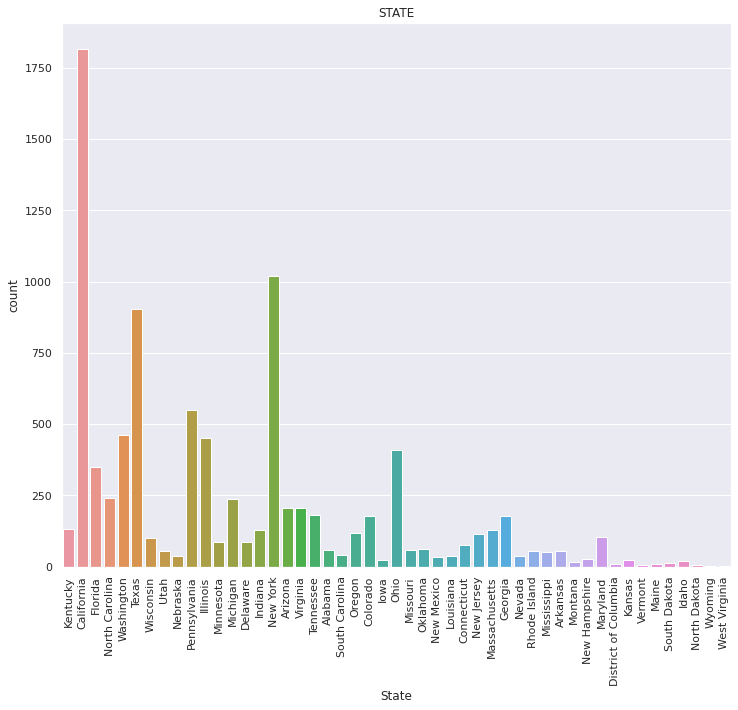

In [98]:
plt.figure(figsize=(12,10))
sns.countplot(x = data_df['State'])
plt.title('STATE')
plt.xticks(rotation=90)
plt.show

# Import **ggplot** using **plotnine** library

In [99]:
from plotnine import *
import warnings
warnings.filterwarnings('ignore')

# **Graphical data of the profit & loss of every category**

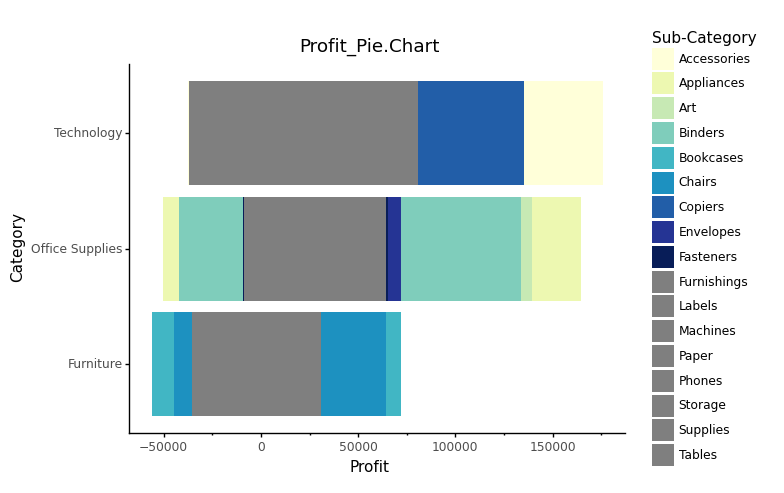

<ggplot: (8776138183737)>

In [100]:
Profit = (ggplot(data_df, aes(x = 'Category' , y = 'Profit' , fill = 'Sub-Category')) + geom_col() + coord_flip() + scale_fill_brewer(type = 'seq' , palette = "YlGnBu") + theme_classic() + ggtitle('Profit_Pie.Chart'))
display(Profit)

# **Graphical data of the profit & loss of every sub-category**

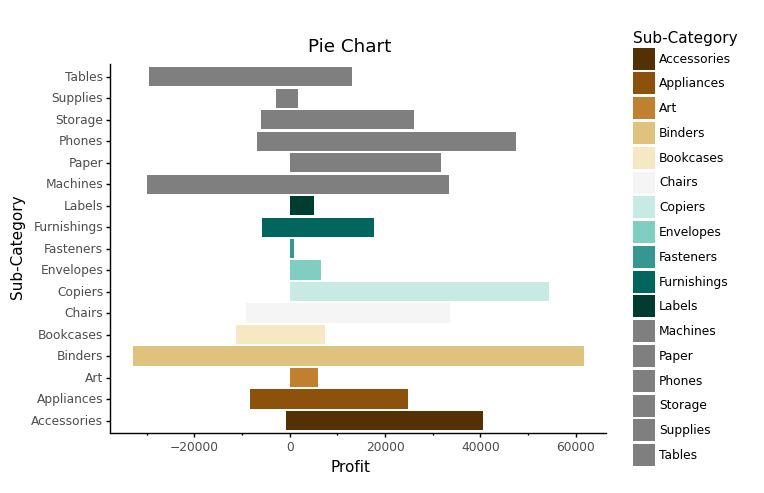

<ggplot: (8776138253469)>

In [101]:
Profit_sub = (ggplot(data_df, aes(x = 'Sub-Category' , y = 'Profit' , fill = 'Sub-Category')) + geom_col() + coord_flip() + scale_fill_brewer(type = 'div' , palette = "BrBG") + theme_classic() + ggtitle('Pie Chart'))

display(Profit_sub)

* Here from the graph we can visualize that "binders" sub-category has suffered the highest amount of loss and also profit amongst all other sub Categories (For now we can't say that what is the reason it ma se because of discounts given on binders subcategory).

* Next,"Copiers" sub-category has gained highest amount of profit with no loss. There are other sub-categories too haven't faced any kind of losses but their profit margins are also low.

* Next, suffering from highest loss is machines.

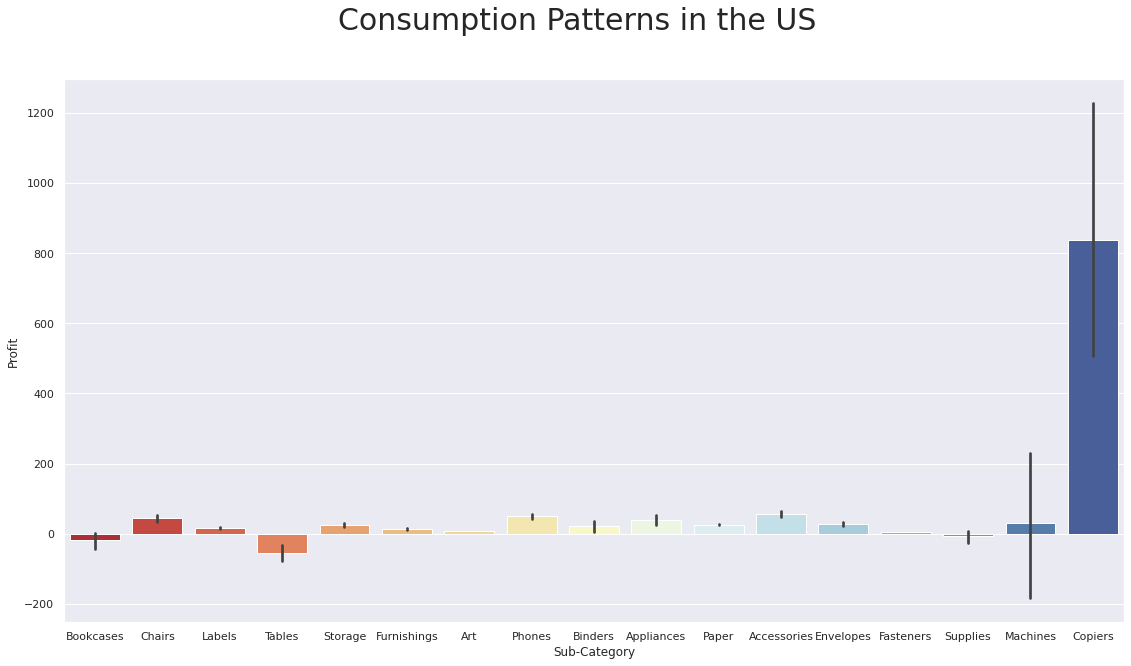

In [102]:
sns.set(style = "darkgrid")
plt.figure(2, figsize = (19,10))
sns.barplot(x = 'Sub-Category' , y = 'Profit' , data = data_df , palette = "RdYlBu")
plt.suptitle("Consumption Patterns in the US", fontsize = 30)
plt.show()

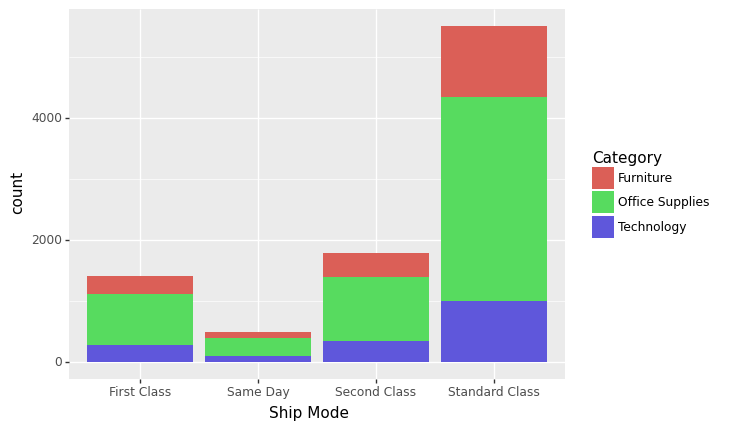

<ggplot: (8776165543049)>

In [103]:
ggplot(data_df, aes(x = 'Ship Mode', fill = 'Category')) + geom_bar(stat = 'count')

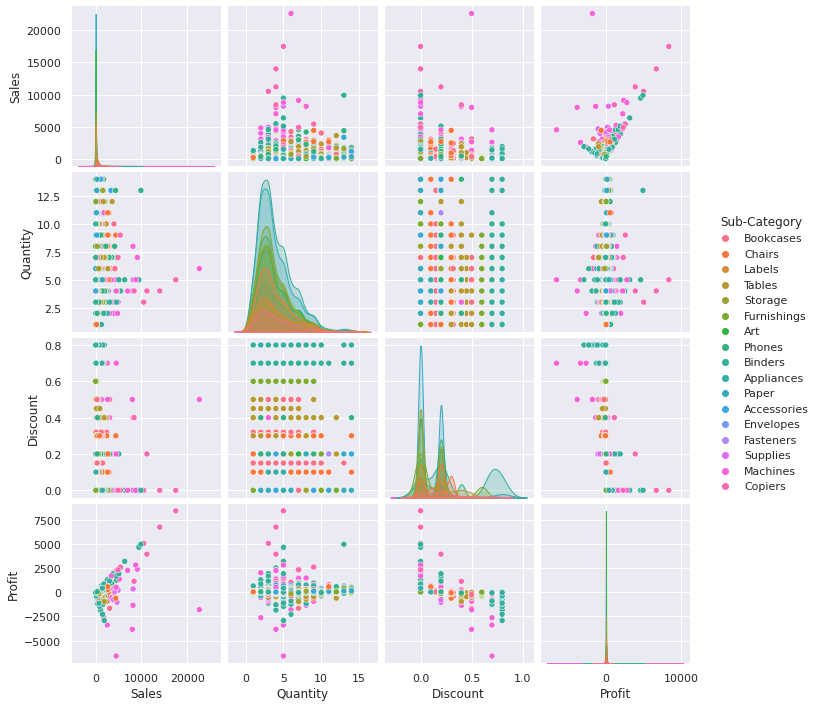

In [104]:
figsize = (25,15)
sns.pairplot(data_df, hue = 'Sub-Category')
plt.show()

From the above plot we can say that our data is not normal and it has some amount of outliers too, Let's explore more about these outliers by using boxplots. First of all, We will check sales from every segments of whole data.

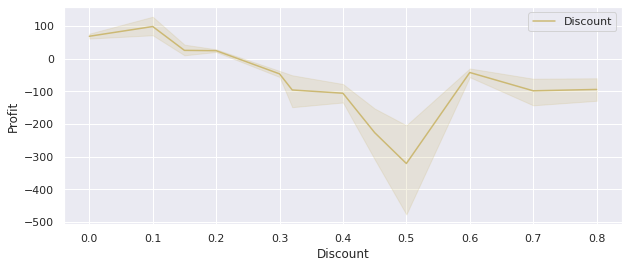

In [105]:
plt.figure(figsize=(10,4))
sns.lineplot('Discount','Profit', data=data_df , color='y',label='Discount')
plt.legend()
plt.show()

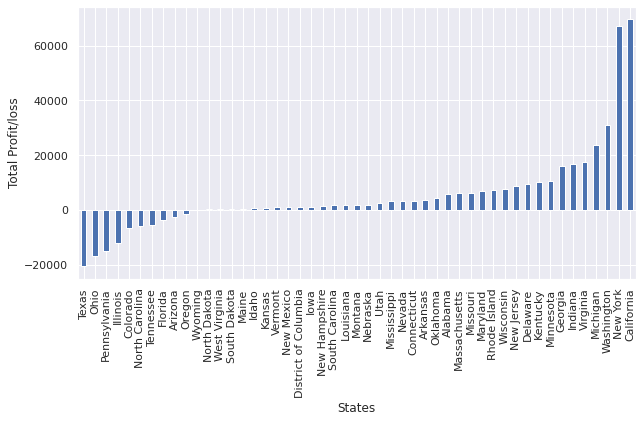

In [106]:
#total state-wise profit/loss
state_profit = data_df.groupby('State')['Profit'].sum().sort_values().plot.bar(figsize = (10,5))
plt.ylabel('Total Profit/loss') 
plt.xlabel('States')
plt.show()

In [107]:
def state_data_viewer(states):
    product_data = data1.groupby(['State'])
    for state in states:
        data = product_data.get_group(state).groupby(['Category'])
        fig, ax = plt.subplots(1, 3, figsize = (30,5))
        fig.suptitle(state, fontsize=14)        
        ax_index = 0
        for category in ['Furniture', 'Office Supplies', 'Technology']:
            cat_df_data = data.get_group(category).groupby(['Sub-Category']).sum()
            sns.barplot(x = cat_df_data.Profit, y = cat_df_data.index, ax = ax[ax_index])
            ax[ax_index].set_ylabel(category)
            ax_index +=1
        fig.show()

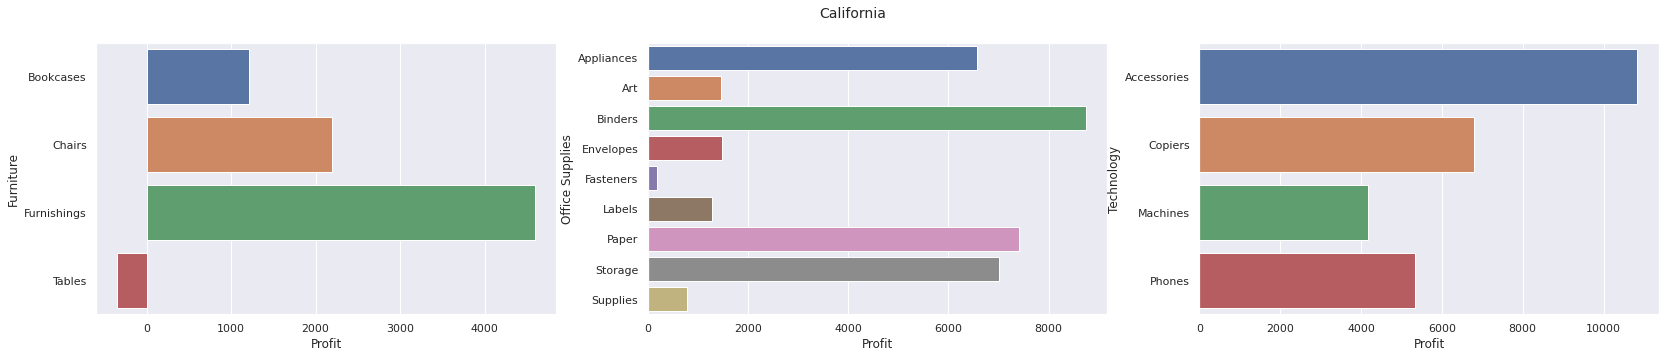

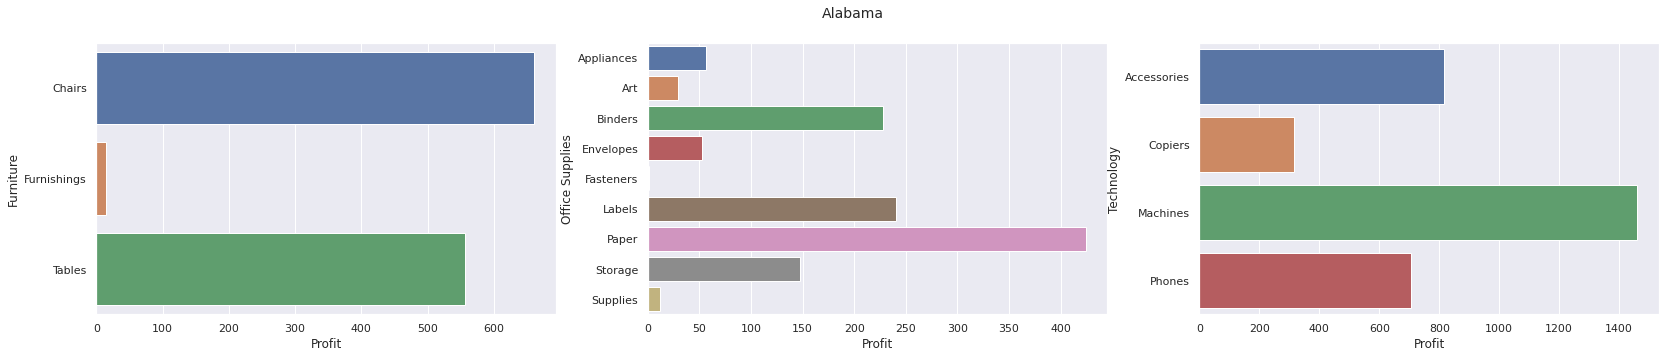

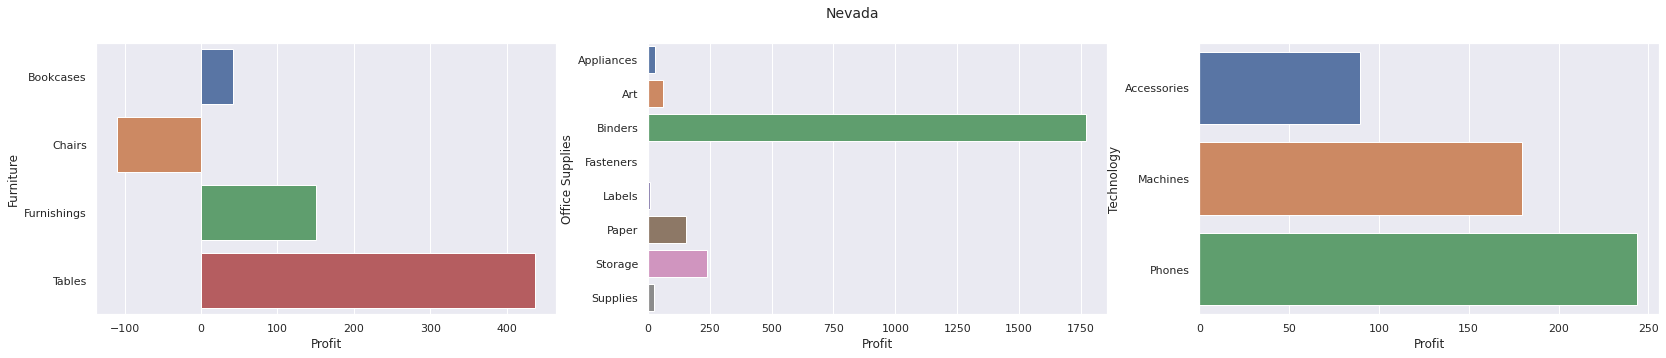

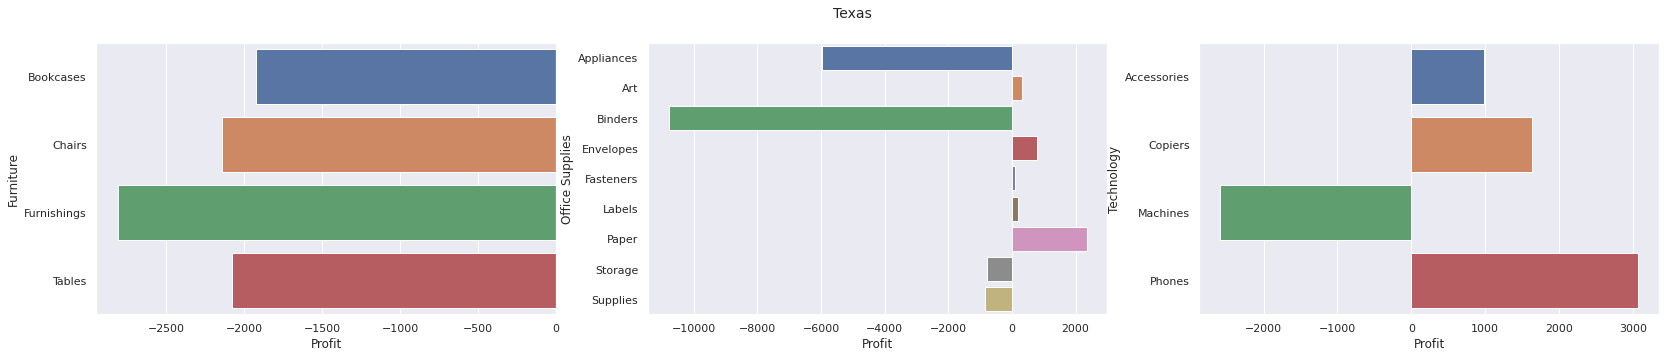

In [79]:
states = ['California', 'Alabama', 'Nevada', 'Texas']
state_data_viewer(states)

**OBSERVATIONS:**

###1) It's necessary to increase the sales of the Furniture to generate more profits.
###2) Increase the profits generated by Office Supplies using a better recommendation system to accompany when a consumer buys the Furniture or Technology related items.
###3) Regulating the proper prices to make better profits as the number of items increase.
###4) the discounts should be properly manipulated when there is increase in the number of items.
###5) Increase the profits in these states: ['Ohio', 'Colorado', 'North Carolina', 'Tennessee', 'Pennsylvania', 'Texas', 'Illinois', 'Arizona', 'Oregon', 'Florida']

# Conclusion

I have successfully analyzed & explored the data of SamplesuperStore and I have provided several possible solution on which company can work and improve their results.